In [1]:
import numpy as np
import pandas as pd

The project is about detection of correlation between various factors such as hypertension, age, gender, smoking habit, marital status, working type, residencial preferences, lifestyle and current health measures to predict the chances of stroke.

In [2]:
df = pd.read_csv("C:/Users/hp/Desktop/CS/sem 8/pracs ads/healthcare-dataset-stroke-data.csv")
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='stroke', ylabel='count'>

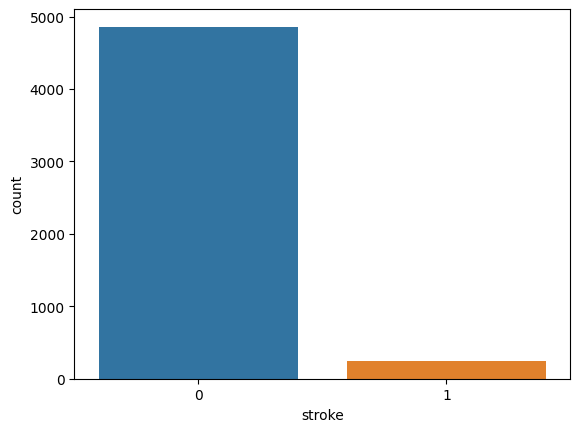

In [5]:
%pip install seaborn
import seaborn as sns
sns.countplot(x = df['stroke'])

In [6]:
import matplotlib.pyplot as plt

<Axes: xlabel='heart_disease', ylabel='count'>

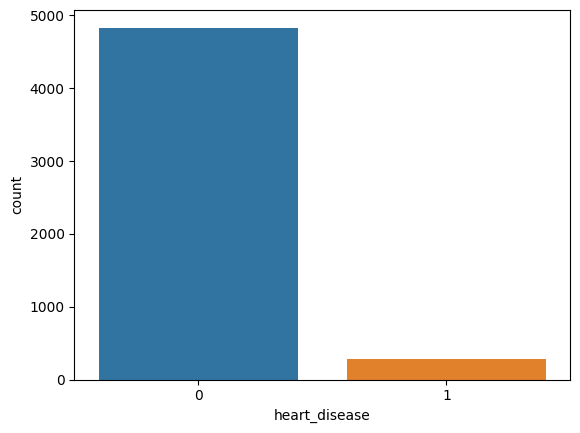

In [7]:
sns.countplot(x = df["heart_disease"])

<Axes: xlabel='stroke', ylabel='count'>

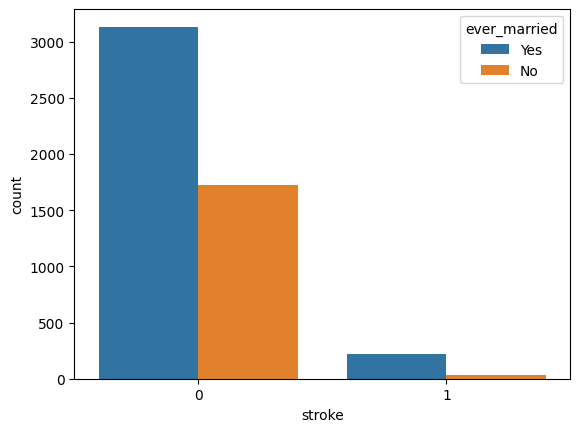

In [8]:
sns.countplot(x= df["stroke"], hue= df["ever_married"])

<Axes: xlabel='stroke', ylabel='count'>

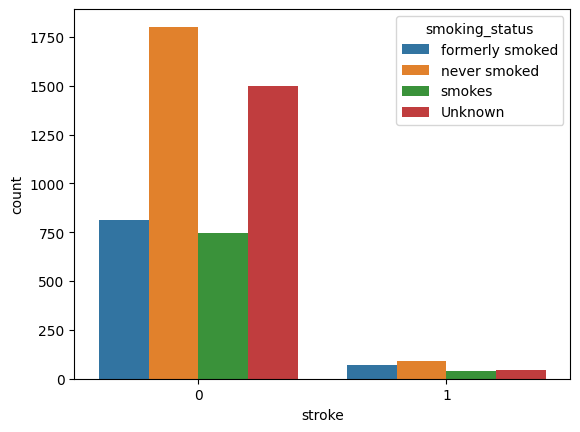

In [9]:
sns.countplot(x= df['stroke'], hue= df['smoking_status'])

In [10]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df.drop('id',axis=1, inplace=True)

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In this section we will prepare the data for training purpose

Firstly, assigning genders numerical values to categorize

In [13]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [14]:
def change(gen):
    if gen == "Male":
        return 0
    if gen == "Female":
        return 1
    else:
        return 2

df['gender'] = df['gender'].apply(change)

Handling the marital attribute

In [15]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['ever_married'] = pd.get_dummies(df['ever_married'], drop_first= True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,True,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,True,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,True,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,True,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,True,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
##Work type
def alter(col):
    if col == 'Private':
        return 0
    elif col == 'Self-employed':
        return 1
    elif col == 'Govt_job':
        return 2
    elif col == 'children':
        return 3
    else:
        return 4

df['work_type'] = df['work_type'].apply(alter)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,True,0,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,True,1,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,True,0,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,True,0,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,True,1,Rural,174.12,24.0,never smoked,1


Residential area

In [18]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [20]:
df['Residence_type'] = pd.get_dummies(df['Residence_type'], drop_first=True)

In [21]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,True,0,True,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,True,1,False,202.21,NaN,never smoked,1
2,0,80.0,0,1,True,0,False,105.92,32.5,never smoked,1
3,1,49.0,0,0,True,0,True,171.23,34.4,smokes,1
4,1,79.0,1,0,True,1,False,174.12,24.0,never smoked,1


Smoking

In [22]:
def smoke(condition):
    if condition == "formerly smoked":
        return 0
    if condition == "never smoked":
        return 1
    if condition == "smokes":
        return 2
    else :
        return 3

df['smoking_status'] = df["smoking_status"].apply(smoke)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,True,0,True,228.69,36.6,0,1
1,1,61.0,0,0,True,1,False,202.21,NaN,1,1
2,0,80.0,0,1,True,0,False,105.92,32.5,1,1
3,1,49.0,0,0,True,0,True,171.23,34.4,2,1
4,1,79.0,1,0,True,1,False,174.12,24.0,1,1


The null values in BMI needs to be handled

In [23]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,True,0,True,228.69,36.6,0,1
1,1,61.0,0,0,True,1,False,202.21,28.1,1,1
2,0,80.0,0,1,True,0,False,105.92,32.5,1,1
3,1,49.0,0,0,True,0,True,171.23,34.4,2,1
4,1,79.0,1,0,True,1,False,174.12,24.0,1,1


In [25]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [26]:
X = df.iloc[:,:-1].values
print(X)

[[0 67.0 0 ... 228.69 36.6 0]
 [1 61.0 0 ... 202.21 28.1 1]
 [0 80.0 0 ... 105.92 32.5 1]
 ...
 [1 35.0 0 ... 82.99 30.6 1]
 [0 51.0 0 ... 166.29 25.6 0]
 [1 44.0 0 ... 85.28 26.2 3]]


In [30]:
Y = df.iloc[:,-1].values
print(Y)

[1 1 1 ... 0 0 0]


Training the Model 

In [34]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state= 1)

                                              0.0/8.3 MB ? eta -:--:--
     -                                        0.3/8.3 MB 10.6 MB/s eta 0:00:01
     ---                                      0.7/8.3 MB 8.7 MB/s eta 0:00:01
     ----                                     0.9/8.3 MB 7.0 MB/s eta 0:00:02
     -----                                    1.1/8.3 MB 6.1 MB/s eta 0:00:02
     -----                                    1.2/8.3 MB 5.9 MB/s eta 0:00:02
     ------                                   1.4/8.3 MB 5.5 MB/s eta 0:00:02
     -------                                  1.5/8.3 MB 5.4 MB/s eta 0:00:02
     --------                                 1.7/8.3 MB 5.2 MB/s eta 0:00:02
     --------                                 1.8/8.3 MB 5.0 MB/s eta 0:00:02
     ---------                                2.0/8.3 MB 5.0 MB/s eta 0:00:02
     ---------                                2.0/8.3 MB 4.8 MB/s eta 0:00:02
     -----------                              2.3/8.3 MB 4.6 MB/s eta 

Feature Scaling 

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Training the model 

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[962   0]
 [ 60   0]]


0.9412915851272016

Z test

In [38]:
import scipy.stats as stats

# Load your dataset into a DataFrame, assuming it's stored in a variable called 'df'
# 'stroke' is assumed to be a binary attribute with values 0 and 1
# 'bmi' is assumed to be a continuous attribute that you want to compare between the two groups

# Extract the 'bmi' values for the two groups based on 'stroke' values
bmi_group_0 = df[df['stroke'] == 0]['bmi']
bmi_group_1 = df[df['stroke'] == 1]['bmi']

# Perform the z-test
z_stat, p_value = stats.ttest_ind(bmi_group_0, bmi_group_1, equal_var=False)

# 'stats.ttest_ind()' performs an independent t-test assuming unequal variances (Welch's t-test)
# 'bmi_group_0' and 'bmi_group_1' are the two groups being compared
# 'equal_var=False' specifies that the variances of the two groups are not assumed to be equal

# Print the results
print("Z-statistic: ", z_stat)
print("P-value: ", p_value)

Z-statistic:  -3.329087262168958
P-value:  0.0009820743804642416
